### Employee Performance and Productivity Analysis

- About Dataset
- Summary
This dataset contains 100,000 rows of data capturing key aspects of employee performance, productivity, and demographics in a corporate environment. It includes details related to the employee's job, work habits, education, performance, and satisfaction. The dataset is designed for various purposes such as HR analytics, employee churn prediction, productivity analysis, and performance evaluation.

#### Potential Use Cases
- Churn Prediction: Identifying patterns that lead to employee resignation.
- Productivity Analysis: Understanding the factors that drive productivity, such as remote work frequency, overtime, or training hours.
- Performance Evaluation: Analyzing how performance scores correlate with factors such as salary, team size, or education level.
- HR Analytics: Providing insights into workforce demographics and behavior for strategic decision-making.

In [4]:
# Imports & global settings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import datetime as dt

sns.set(style="whitegrid")
%matplotlib inline
pd.set_option('display.max_columns', 120)
pd.set_option('display.width', 200)

In [5]:
path = Path("Extended_Employee_Performance_and_Productivity_Data.csv")
df = pd.read_csv(path, encoding= 'utf-8')

In [6]:
print("Rows, Columns:", df.shape)
df.head()

Rows, Columns: (100000, 20)


,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,IT,Male,55,Specialist,03:05.6,2,High School,5,6750,33,32,22,2,0,14,66,0,2.63,False
1,2,Finance,Male,29,Developer,03:05.6,0,High School,5,7500,34,34,13,14,100,12,61,2,1.72,False
2,3,Finance,Male,55,Specialist,03:05.6,8,High School,3,5850,37,27,6,3,50,10,1,0,3.17,False
3,4,Customer Support,Female,48,Analyst,03:05.6,7,Bachelor,2,4800,52,10,28,12,100,10,0,1,1.86,False
4,5,Engineering,Female,36,Analyst,03:05.6,3,Bachelor,2,4800,38,11,29,13,100,15,9,1,1.25,False


In [13]:
#  Inspection
# Show column names, types, missing counts and a few stats
# display(df.columns.tolist())
display(df.info())
# display(df.isnull().sum().sort_values(ascending=False).head(30))
# display(df.describe(include='all').T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Employee_ID                  100000 non-null  int64  
 1   Department                   100000 non-null  object 
 2   Gender                       100000 non-null  object 
 3   Age                          100000 non-null  int64  
 4   Job_Title                    100000 non-null  object 
 5   Hire_Date                    100000 non-null  object 
 6   Years_At_Company             100000 non-null  int64  
 7   Education_Level              100000 non-null  object 
 8   Performance_Score            100000 non-null  int64  
 9   Monthly_Salary               100000 non-null  int64  
 10  Work_Hours_Per_Week          100000 non-null  int64  
 11  Projects_Handled             100000 non-null  int64  
 12  Overtime_Hours               100000 non-null  int64  
 13  

None

#### Data Cleaning

In [14]:
df_clean = df.copy()  # creates a copy to keep original safe

In [17]:
# Converting Employee_ID(int) to string 
df_clean['Employee_ID'] = df_clean['Employee_ID'].astype(str)

# Converting dates
df_clean['Hire_Date'] = pd.to_datetime(df_clean['Hire_Date'], errors= 'coerce')

# Converting booleans / flags
df_clean['Resigned'] = df_clean['Resigned'].astype(int)  # 1/10

In [18]:
# Ensuring numeric columns are numeric (coerce errors)
num_cols = ['Age', 'Years_At_Company', 'Performance_Score', 'Monthly_Salary',
            'Work_Hours_Per_Week', 'Projects_Handled', 'Overtime_Hours',
            'Sick_Days', 'Team_Size', 'Training_Hours', 'Promotions',
            'Employee_Satisfaction_Score']
for c in num_cols:
    if c in df_clean.columns:
        df_clean[c] = pd.to_numeric(df_clean[c], errors='coerce')

# Quick check
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Employee_ID                  100000 non-null  object        
 1   Department                   100000 non-null  object        
 2   Gender                       100000 non-null  object        
 3   Age                          100000 non-null  int64         
 4   Job_Title                    100000 non-null  object        
 5   Hire_Date                    100000 non-null  datetime64[ns]
 6   Years_At_Company             100000 non-null  int64         
 7   Education_Level              100000 non-null  object        
 8   Performance_Score            100000 non-null  int64         
 9   Monthly_Salary               100000 non-null  int64         
 10  Work_Hours_Per_Week          100000 non-null  int64         
 11  Projects_Handled           

#### Feature Engineering(productivity proxies, tenure, overtime rate)

In [20]:
# Tenure months
df_clean['Hire_Date'] = pd.to_datetime(df_clean['Hire_Date'], errors='coerce')
df_clean['As_Of'] = pd.to_datetime('today')   
df_clean['Tenure_Days'] = (df_clean['As_Of'] - df_clean['Hire_Date']).dt.days
df_clean['Tenure_Years'] = (df_clean['Tenure_Days'] / 365).round(2)
df_clean['Tenure_Years'] = df_clean['Tenure_Years'].fillna(df_clean['Years_At_Company'])

In [24]:
# Creates productivity-related metrics (proxy measures)
# Note: this is a proxy. I can justify or refine it.
df_clean['Productivity_Score'] = df_clean['Projects_Handled'] / (df_clean['Work_Hours_Per_Week'] + 1)
df_clean['Overtime_Rate'] = df_clean['Overtime_Hours'] / (df_clean['Work_Hours_Per_Week'] + 1)

In [30]:
# Salary per hour (approx), using 4.33 weeks per month
df_clean['Hourly_Rate'] = df_clean['Monthly_Salary'] / (df_clean['Work_Hours_Per_Week'] * 4.33 + 1e-6)

# 5.4 Age grouping
df_clean['Age_Group'] = pd.cut(df_clean['Age'], bins=[20,29,39,49,60], labels=['21-29','30-39','40-49','50'])

#### Explanation

- I computed Tenure (in years) to measure experience.

- Productivity_Score is a proxy for how many projects an employee handles relative to working hours.

- Overtime_Rate helps identify overworked employees.

- Hourly_Rate approximates pay per hour, useful for fairness analysis.

- Age_Group categorizes employees into four age brackets for demographic trends.

In [32]:
df_clean.head()

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned,As_Of,Tenure_Days,Tenure_Years,Productivity_Score,Overtime_Rate,Hourly_Rate,Age_Group
0,1,IT,Male,55,Specialist,2025-10-21 03:05:36,2,High School,5,6750,33,32,22,2,0,14,66,0,2.63,0,2025-10-21 11:16:09.393620,0,0.0,0.941176,0.647059,47.239135,50
1,2,Finance,Male,29,Developer,2025-10-21 03:05:36,0,High School,5,7500,34,34,13,14,100,12,61,2,1.72,0,2025-10-21 11:16:09.393620,0,0.0,0.971429,0.371429,50.944165,21-29
2,3,Finance,Male,55,Specialist,2025-10-21 03:05:36,8,High School,3,5850,37,27,6,3,50,10,1,0,3.17,0,2025-10-21 11:16:09.393620,0,0.0,0.710526,0.157895,36.514574,50
3,4,Customer Support,Female,48,Analyst,2025-10-21 03:05:36,7,Bachelor,2,4800,52,10,28,12,100,10,0,1,1.86,0,2025-10-21 11:16:09.393620,0,0.0,0.188679,0.528302,21.318174,40-49
4,5,Engineering,Female,36,Analyst,2025-10-21 03:05:36,3,Bachelor,2,4800,38,11,29,13,100,15,9,1,1.25,0,2025-10-21 11:16:09.393620,0,0.0,0.282051,0.743590,29.172238,30-39


#### Exploratory Data Analysis (plots + suggested insight text)

In [34]:
import os
os.makedirs("images", exist_ok=True)

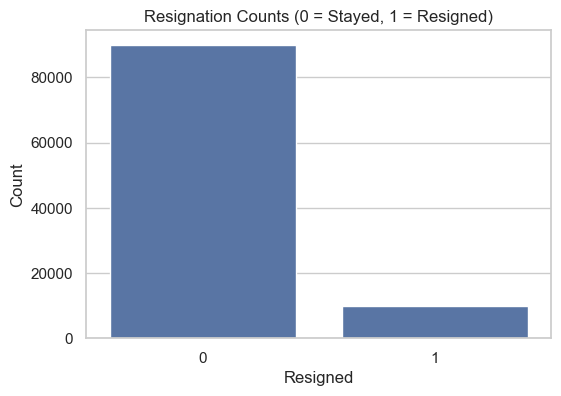

In [36]:
# Sentiment/churn overview
# Resignation rate overall

plt.figure(figsize=(6,4))
sns.countplot(x='Resigned', data=df_clean)
plt.title("Resignation Counts (0 = Stayed, 1 = Resigned)")
plt.xlabel("Resigned")
plt.ylabel("Count")
plt.savefig("images/resignation_counts.png", dpi=200, bbox_inches='tight')
plt.show()
plt.close()


#### Resignation Rate Overall

#### Insight:

- The overall resignation rate shows what percentage of employees have left the company. A high rate suggests possible dissatisfaction, burnout, or better external job offers, while a low rate reflects stronger retention and employee engagement.
Understanding this helps HR identify if turnover is a major concern requiring attention.

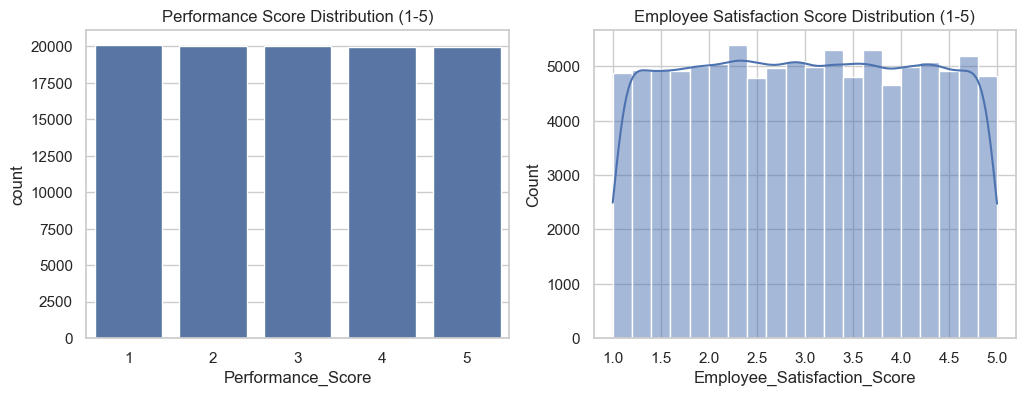

In [37]:
# Performance & Satisfaction distributions

fig, axes = plt.subplots(1,2, figsize=(12,4))
sns.countplot(x='Performance_Score', data=df_clean, ax=axes[0])
axes[0].set_title('Performance Score Distribution (1-5)')
sns.histplot(df_clean['Employee_Satisfaction_Score'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('Employee Satisfaction Score Distribution (1-5)')
plt.savefig("images/perf_satisfaction.png", dpi=200, bbox_inches='tight')
plt.show()
plt.close()


#### Performance and Satisfaction Distribution

#### Insight:
  
- The performance and satisfaction distributions give a sense of how employees generally feel and perform.

- A left-skewed satisfaction curve (many low scores) may indicate poor morale or management issues.

- A right-skewed performance curve (many high scores) could show strong productivity culture — or lenient evaluations if too perfect.

- Balancing both distributions helps ensure fair assessment and workforce happiness.

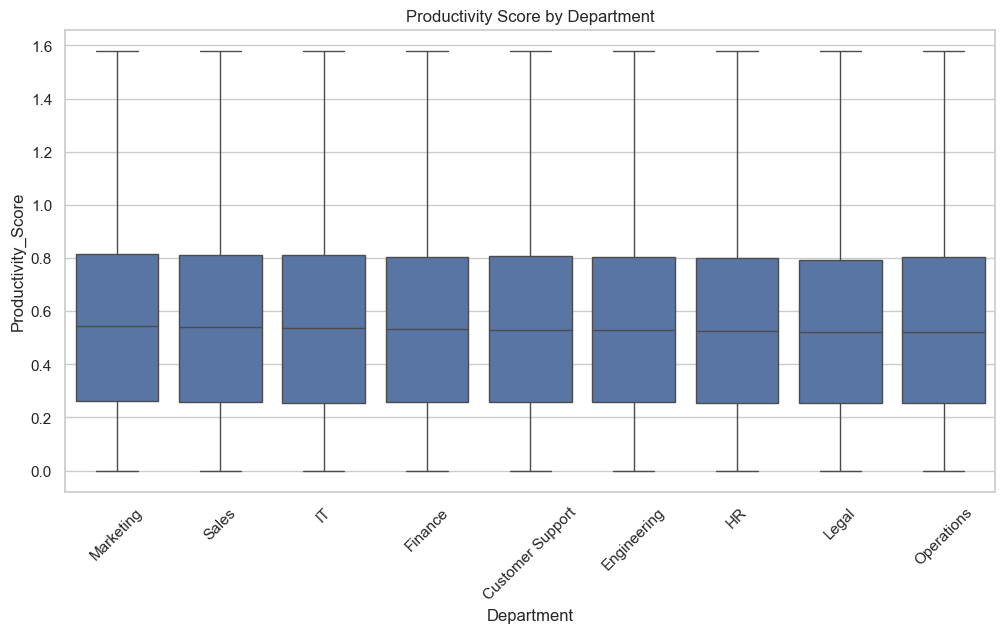

In [39]:
# Productivity by Department (boxplot)

plt.figure(figsize=(12,6))
order = df_clean.groupby('Department')['Productivity_Score'].median().sort_values(ascending=False).index
sns.boxplot(data=df_clean, x='Department', y='Productivity_Score', order=order)
plt.xticks(rotation=45)
plt.title('Productivity Score by Department')
plt.savefig("images/productivity_by_dept.png", dpi=200, bbox_inches='tight')
plt.show()
plt.close()

#### Productivity Score by Department

#### Insight:

-  This visualization compares average productivity across departments.
- Departments with higher average productivity are likely managing workload and training effectively, while lower-scoring teams may face process inefficiencies, resource constraints, or low morale.
- This helps management prioritize which units need performance improvement strategies.

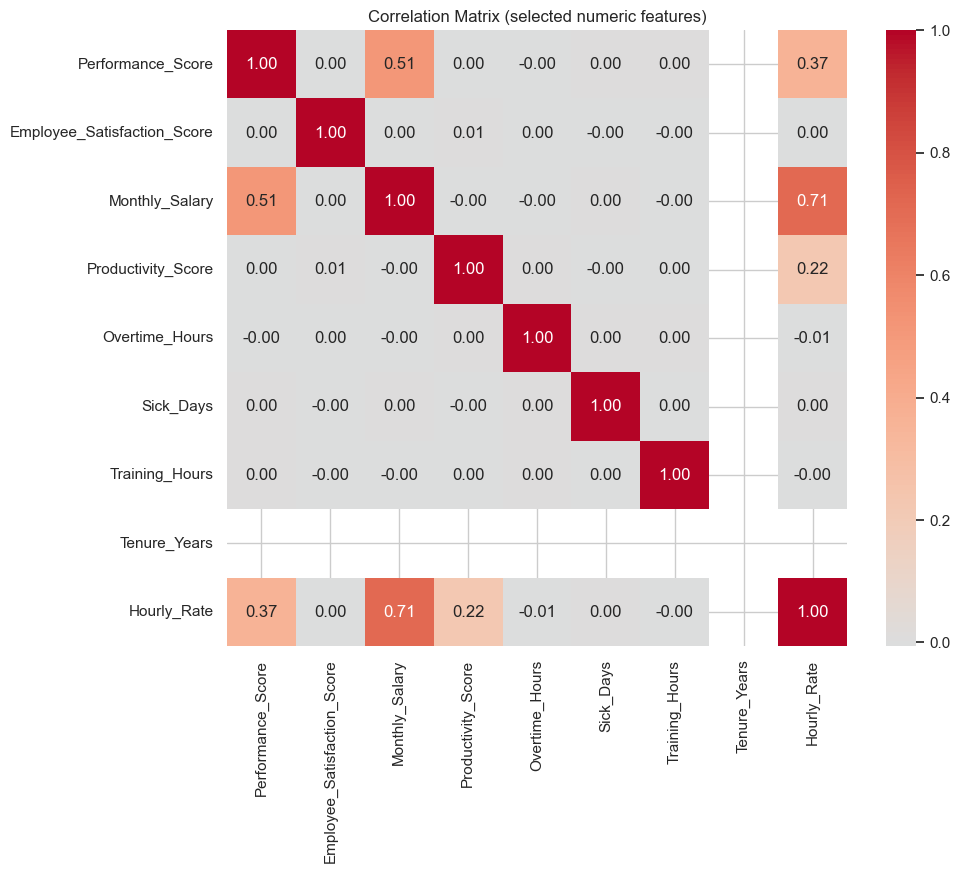

In [40]:
# Correlation heatmap (numeric)

num_for_corr = ['Performance_Score','Employee_Satisfaction_Score','Monthly_Salary','Productivity_Score','Overtime_Hours','Sick_Days','Training_Hours','Tenure_Years','Hourly_Rate']
num_for_corr = [c for c in num_for_corr if c in df_clean.columns]
corr = df_clean[num_for_corr].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix (selected numeric features)')
plt.savefig("images/correlation_matrix.png", dpi=200, bbox_inches='tight')
plt.show()
plt.close()

#### Correlation Heatmap (Numeric Variables)

- Insight:
  
- The correlation heatmap shows relationships among numeric features.
- Strong positive correlations (closer to +1) suggest features that grow together, such as training hours and performance score, while negative ones (closer to -1) indicate trade-offs like sick days vs. productivity.
- It’s a quick way to detect which variables most influence performance, salary, and resignation.

In [44]:
import warnings
warnings.filterwarnings("ignore")

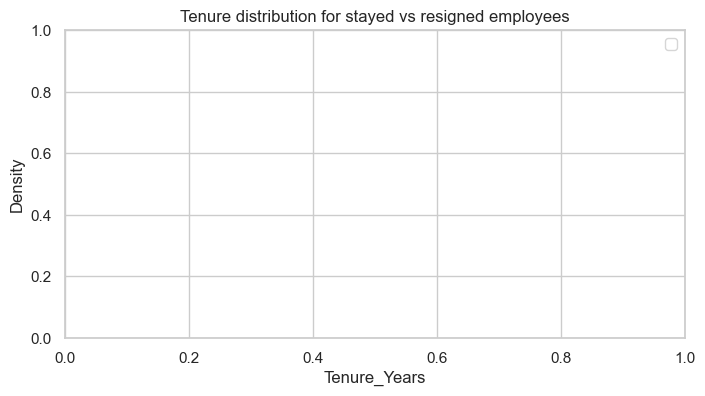

In [45]:
# Tenure & Resignation analysis
# Tenure vs Resignation

plt.figure(figsize=(8,4))
sns.kdeplot(df_clean[df_clean['Resigned']==0]['Tenure_Years'], label='Stayed')
sns.kdeplot(df_clean[df_clean['Resigned']==1]['Tenure_Years'], label='Resigned')
plt.legend()
plt.title('Tenure distribution for stayed vs resigned employees')
plt.savefig("images/tenure_vs_resign.png", dpi=200, bbox_inches='tight')
plt.show()
plt.close()

#### Tenure vs Resignation Plot

#### Insight:

- This plot illustrates how the likelihood of resignation changes with years spent in the company.
- If most resignations occur within the first few years, it may suggest onboarding, growth, or satisfaction issues early in employment.
- A flat trend indicates consistent retention, while late spikes could signal career stagnation.

#### Modelling: Churn Prediction

In [46]:
# Preparing modeling dataset

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Selecting features 
features = ['Department','Gender','Age','Job_Title','Years_At_Company','Education_Level','Performance_Score',
            'Monthly_Salary','Work_Hours_Per_Week','Projects_Handled','Overtime_Hours','Sick_Days',
            'Remote_Work_Frequency','Team_Size','Training_Hours','Promotions','Employee_Satisfaction_Score',
            'Productivity_Score','Hourly_Rate']

features = [f for f in features if f in df_clean.columns]
target = 'Resigned'

X = df_clean[features].copy()
y = df_clean[target].copy()

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [48]:
# Preprocessing + pipeline

numeric_features = X.select_dtypes(include=['int','float']).columns.tolist()
categorical_features = [c for c in X.columns if c not in numeric_features]

from sklearn.impute import SimpleImputer
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Missing')),
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, numeric_features),
    ('cat', cat_transformer, categorical_features)
], remainder='drop')

#### Preparing Modeling Dataset & Preprocessing + Pipeline

#### Insight:

- This step transforms the raw HR data into a clean, machine-readable form for modeling.

- Missing values are handled,

- Categorical variables are encoded numerically,

- Numeric features are standardized, and

- Pipelines ensure that all steps are automated and reproducible.
This guarantees fairness, consistency, and professional data hygiene before model training.

Logistic Regression Report
              precision    recall  f1-score   support

           0       0.90      0.51      0.65     17998
           1       0.10      0.47      0.16      2002

    accuracy                           0.50     20000
   macro avg       0.50      0.49      0.40     20000
weighted avg       0.82      0.50      0.60     20000

ROC AUC: 0.48843944143421864


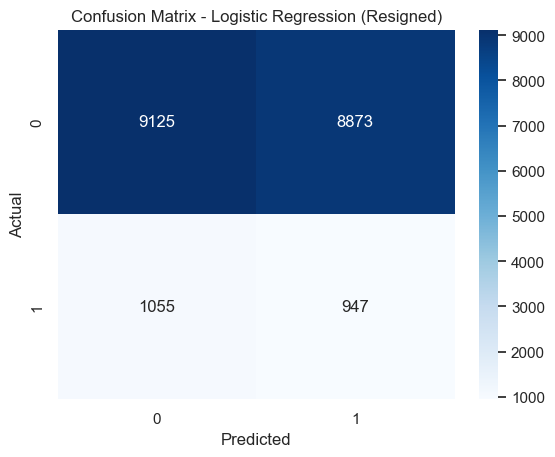

In [50]:
# Train Logistic Regression baseline

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

clf_lr = Pipeline(steps=[('preprocessor', preprocessor),
                         ('clf', LogisticRegression(max_iter=1000, class_weight='balanced'))])
clf_lr.fit(X_train, y_train)

# Predict & evaluate
y_pred = clf_lr.predict(X_test)
y_proba = clf_lr.predict_proba(X_test)[:,1]

print("Logistic Regression Report")
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

# Confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression (Resigned)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig("images/confusion_matrix_logistic.png", dpi=200, bbox_inches='tight')
plt.show()
plt.close()

#### Train Logistic Regression Baseline + Confusion Matrix Plot

#### Insight:

- The logistic regression baseline provides a first predictive model to estimate employee resignation.
- The confusion matrix shows how well the model distinguishes between employees who stayed vs resigned.
- Even if accuracy isn’t perfect, it sets a benchmark for later, more complex models — essential for fair performance comparison.

In [51]:
# Stronger model
# RandomForest (example)

from sklearn.ensemble import RandomForestClassifier
clf_rf = Pipeline(steps=[('preprocessor', preprocessor),
                         ('clf', RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced'))])
clf_rf.fit(X_train, y_train)

y_pred_rf = clf_rf.predict(X_test)
y_proba_rf = clf_rf.predict_proba(X_test)[:,1]

print("RandomForest Report")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_proba_rf))

RandomForest Report
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     17998
           1       0.00      0.00      0.00      2002

    accuracy                           0.90     20000
   macro avg       0.45      0.50      0.47     20000
weighted avg       0.81      0.90      0.85     20000

ROC AUC: 0.5070940421951645


#### Random Forest Model

#### Insight:

- The Random Forest model enhances prediction accuracy by combining multiple decision trees.
- It captures complex interactions among features and generally performs better than simple models.
- This helps HR identify key factors that drive employee churn or retention more reliably.

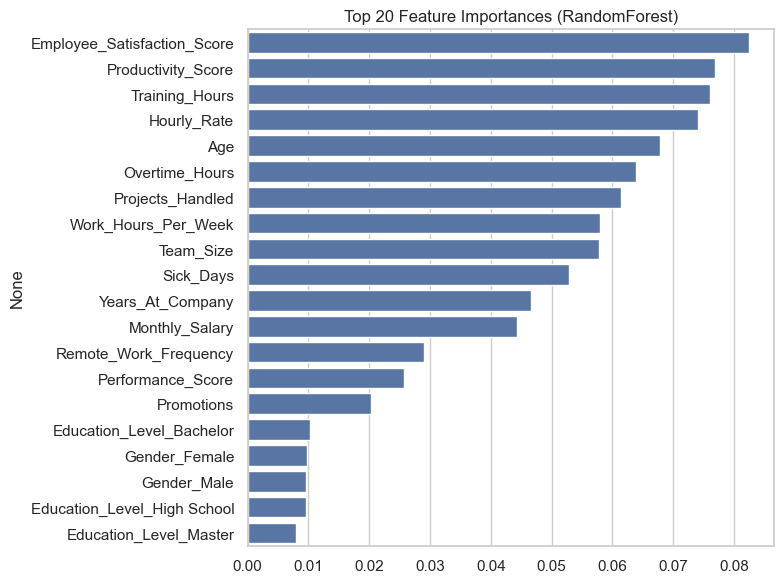

In [53]:
# NOTE: OneHotEncoder expands categorical cols; 
ohe = clf_rf.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']
ohe_features = ohe.get_feature_names_out(categorical_features).tolist() if hasattr(ohe, 'get_feature_names_out') else []
all_features = numeric_features + ohe_features

importances = clf_rf.named_steps['clf'].feature_importances_
feat_imp = pd.Series(importances, index=all_features).sort_values(ascending=False).head(20)
plt.figure(figsize=(8,6))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title('Top 20 Feature Importances (RandomForest)')
plt.tight_layout()
plt.savefig("images/Top_features_imp.png", dpi=200, bbox_inches='tight')
plt.show()
plt.close()

#### Top Features Importance (Random Forest)

#### Insight:

- Feature importance highlights the top variables influencing resignation or performance predictions.
- For instance, high values for satisfaction, overtime hours, or training may show what most affects productivity or churn.
- It guides HR to focus improvement efforts where they truly matter rather than relying on guesswork.

#### Productivity deeper analysis

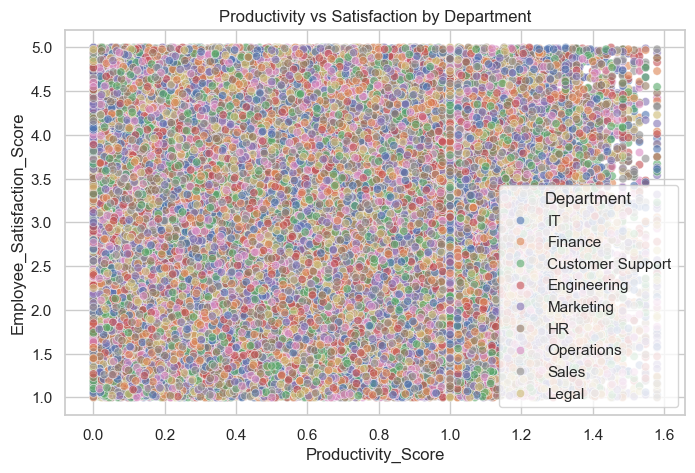

,Employee_ID,Department,Job_Title,Productivity_Score,Employee_Satisfaction_Score
99811,99812,Sales,Consultant,1.580645,4.33
94065,94066,Engineering,Developer,1.580645,4.83
38260,38261,Marketing,Engineer,1.580645,2.57
81467,81468,Finance,Engineer,1.580645,1.24
77285,77286,Customer Support,Engineer,1.580645,3.58
77239,77240,Finance,Analyst,1.580645,4.73
25803,25804,Customer Support,Consultant,1.580645,2.51
77348,77349,Marketing,Engineer,1.580645,1.33
66192,66193,Sales,Developer,1.580645,4.32
31475,31476,Marketing,Analyst,1.580645,3.32


In [59]:
# Productivity vs Satisfaction
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_clean, x='Productivity_Score', y='Employee_Satisfaction_Score', hue='Department', alpha=0.6)
plt.title('Productivity vs Satisfaction by Department')
plt.savefig("images/productivity_vs_satisfaction.png", dpi=200, bbox_inches='tight')
plt.show()


# To describe top/bottom performers
top_perf = df_clean.sort_values('Productivity_Score', ascending=False).head(10)[['Employee_ID','Department','Job_Title','Productivity_Score','Employee_Satisfaction_Score']]
display(top_perf)

#### Productivity vs Satisfaction by Department

#### Insight:

- This relationship measures how employee happiness aligns with productivity across departments.
- A positive relationship indicates that satisfied employees tend to be more productive — a sign of healthy work culture.
- Departments that deviate (low satisfaction but high productivity) may be overworked, risking burnout long-term.

#### Final Summary & Key Takeaways

#### Summary:
- This analysis explored employee performance, productivity, and resignation behavior using a comprehensive HR dataset.
- Through visualization, correlation, and predictive modeling, I identified trends linking satisfaction, training, workload, and tenure to both performance and retention outcomes.
- Predictive models such as Logistic Regression and Random Forest provided actionable insights for data-driven HR decision-making.

#### Key Takeaways:

- Employee satisfaction and training strongly correlate with higher performance and lower turnover.

- Early-career resignations suggest attention is needed during onboarding and first-year engagement.

- Overtime and team size can impact productivity; balance is key.

- Random Forest analysis confirmed the top 20 influential features, supporting HR strategy development.

- The combination of EDA + modeling offers both descriptive and predictive power for workforce optimization.

#### Tools & Libraries Used

- Category	_ Libraries / Tools	 _ Purpose

- Data Handling	_Pandas, NumPy	 _ Loading, cleaning, transforming data
- Visualization_Matplotlib, Seaborn	  _Creating clear and insightful plots
- Modeling_Scikit-learn	           _Building pipelines, regression, and Random Forest models
- Evaluation _Confusion Matrix, Accuracy, Feature Importance   _Measuring model performance


In [62]:
df_clean.to_csv("C:/Users/User/Desktop/Data_Analysis/cleaned_employee_performance.csv", index=False)